In [1]:
import torch
import matplotlib.pyplot as plt

import time

import os.path as osp
import numpy as np

from dataset import make_dataset
from train import make_data_loader, train_step, test_evaluations
from utils import get_device, plot_training_progress
from model import GCNNetwork

from args import *
from utils import *

No module named 'phonopy'
No module named 'phonopy'


In [2]:
train_dataset, validation_dataset, test_dataset = make_dataset()
train_loader, val_loader, test_loader = make_data_loader(train_dataset, validation_dataset, test_dataset)

In [30]:
type(train_dataset[0].x)

numpy.ndarray

In [29]:
type(a[0].x)

list

In [3]:
print(len(train_dataset), len(validation_dataset), len(test_dataset))

device = torch.device("cpu")

in_dim = train_dataset[0].x.shape[-1]
model = GCNNetwork(in_dim)
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=args["learning_rate"])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.8, patience=10, min_lr=1e-8)

33456 4182 4181


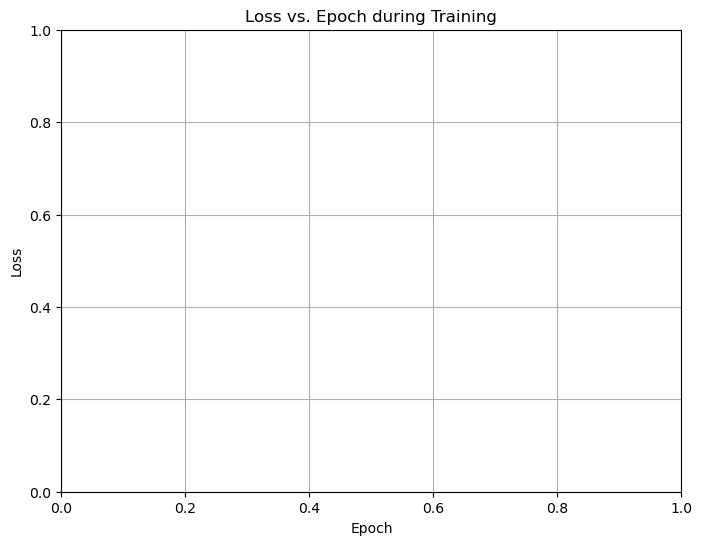

In [4]:
epochs = args["epochs"]

train_losses = []
test_losses = []
val_losses = []

plt.figure(figsize=(8, 6))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch during Training")
plt.grid(True)

Epoch 1, training loss(MAE)=0.0349, validating loss(MAE)=0.031, testing loss(MAE)=0.0324, lr=0.002
Epoch 2, training loss(MAE)=0.0315, validating loss(MAE)=0.0334, testing loss(MAE)=0.0352, lr=0.002
Epoch 3, training loss(MAE)=0.0284, validating loss(MAE)=0.0276, testing loss(MAE)=0.0292, lr=0.002
Epoch 4, training loss(MAE)=0.0271, validating loss(MAE)=0.0335, testing loss(MAE)=0.0349, lr=0.002
Epoch 5, training loss(MAE)=0.0264, validating loss(MAE)=0.0385, testing loss(MAE)=0.0389, lr=0.002
Epoch 6, training loss(MAE)=0.0256, validating loss(MAE)=0.0305, testing loss(MAE)=0.032, lr=0.002
Epoch 7, training loss(MAE)=0.0255, validating loss(MAE)=0.0429, testing loss(MAE)=0.0438, lr=0.002
Epoch 8, training loss(MAE)=0.0248, validating loss(MAE)=0.0338, testing loss(MAE)=0.0346, lr=0.002


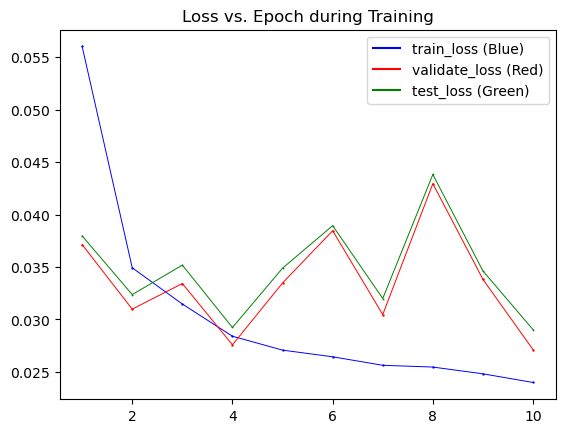

Epoch 9, training loss(MAE)=0.024, validating loss(MAE)=0.0271, testing loss(MAE)=0.029, lr=0.002
Epoch 10, training loss(MAE)=0.0236, validating loss(MAE)=0.0326, testing loss(MAE)=0.0343, lr=0.002
Epoch 11, training loss(MAE)=0.023, validating loss(MAE)=0.0285, testing loss(MAE)=0.03, lr=0.002
Epoch 12, training loss(MAE)=0.0228, validating loss(MAE)=0.0315, testing loss(MAE)=0.0332, lr=0.002
Epoch 13, training loss(MAE)=0.0224, validating loss(MAE)=0.0347, testing loss(MAE)=0.0355, lr=0.002
Epoch 14, training loss(MAE)=0.0217, validating loss(MAE)=0.0284, testing loss(MAE)=0.0301, lr=0.002
Epoch 15, training loss(MAE)=0.0221, validating loss(MAE)=0.03, testing loss(MAE)=0.0312, lr=0.002
Epoch 16, training loss(MAE)=0.0215, validating loss(MAE)=0.0326, testing loss(MAE)=0.0336, lr=0.002
Epoch 17, training loss(MAE)=0.0215, validating loss(MAE)=0.0348, testing loss(MAE)=0.0359, lr=0.002
Epoch 18, training loss(MAE)=0.0215, validating loss(MAE)=0.0295, testing loss(MAE)=0.0309, lr=0.00

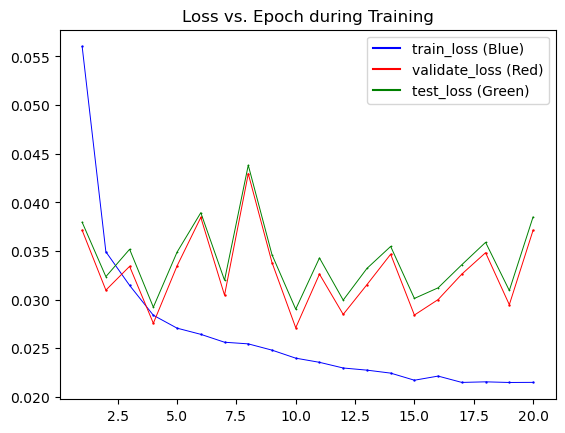

Epoch 19, training loss(MAE)=0.0215, validating loss(MAE)=0.0371, testing loss(MAE)=0.0385, lr=0.002
Epoch 20, training loss(MAE)=0.021, validating loss(MAE)=0.0297, testing loss(MAE)=0.0312, lr=0.0016
Epoch 21, training loss(MAE)=0.0197, validating loss(MAE)=0.0259, testing loss(MAE)=0.0275, lr=0.0016
Epoch 22, training loss(MAE)=0.0194, validating loss(MAE)=0.0248, testing loss(MAE)=0.0265, lr=0.0016
Epoch 23, training loss(MAE)=0.0197, validating loss(MAE)=0.0351, testing loss(MAE)=0.0363, lr=0.0016


KeyboardInterrupt: 

In [6]:
epochs = 1000

for epoch in range(1, epochs + 1):
    # for epoch in range(1, 2):

    model, train_loss = train_step(model, train_loader, train_dataset, optimizer, device)
    val_loss, _, _ = test_evaluations(model, val_loader, validation_dataset, device, ret_data=False)
    test_loss, _, _ = test_evaluations(model, test_loader, test_dataset, device, ret_data=False)

    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]["lr"]

    progress_msg = "Epoch " + str(epoch)
    progress_msg += ", training loss(MAE)=" + str(round(train_loss, 4))
    progress_msg += ", validating loss(MAE)=" + str(round(val_loss, 4))
    progress_msg += ", testing loss(MAE)=" + str(round(test_loss, 4))
    progress_msg += ", lr=" + str(round(current_lr, 8))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    plot_training_progress(len(train_losses), train_losses, val_losses, test_losses, "Loss vs. Epoch during Training")
    print(progress_msg)

MAE of formation of energy is:  tensor(0.2782)
MAE=  0.27821271740550774


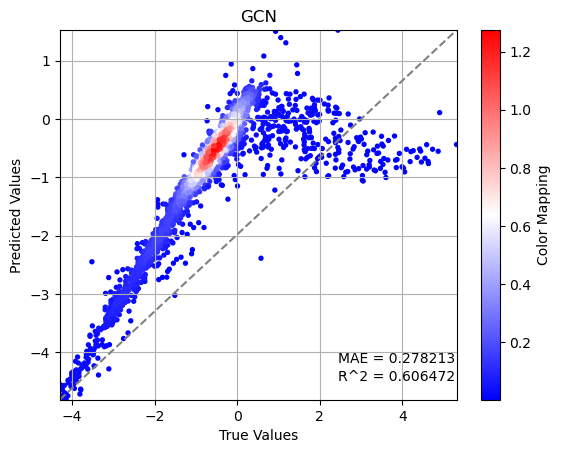

In [10]:
import utilsaaa

result_path = utilsaaa.createResultFolder()
utilsaaa.save_hyper_parameter(args, result_path)
utilsaaa.save_train_progress(epoch - 1, train_losses, val_losses, test_losses, result_path)
test_loss, test_out, test_y = test_evaluations(model, test_loader, test_dataset, device, ret_data=True)

# Reverse normalization of test_out and y
min, max = utilsaaa.get_data_scale(args)
test_y = reverse_min_max_scalar_1d(test_y, min, max)
test_out = reverse_min_max_scalar_1d(test_out, min, max)
loss = (test_out.squeeze() - test_y).abs().mean()
print("MAE of formation energy is: ", loss.item())

save_regression_result(test_out, test_y, result_path)

plot_regression_result("GCN", result_path, plotfilename="regression_figure.jpeg")